# Linear Regression - Example: Salary based on Years of experience

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Salary_Data.csv")

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Splitting dataset in to input and output

In [5]:
x = df.iloc[:,0].values.reshape(-1,1)  #go with negative index we use -1, does the same job

In [6]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
y = df.iloc[:,1].values

### Train Data

In [8]:
from sklearn.linear_model import LinearRegression #import library needed to do linear regression using Ordinary Least Square method

In [9]:
Lin = LinearRegression()  #create an object of the LinearRegression class

In [10]:
Lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction

In [11]:
Lin.predict([[3.5]])

array([58867.06832376])

### Splitting of data in to Test and Train sets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0) #split is 80 - 20, random_state to fix the random pattern, just like setting a seed

In [14]:
x_test.shape

(6, 1)

In [15]:
x_train.shape

(24, 1)

In [16]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

### Training model only with 80% of data

In [17]:
Lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction with Test data

In [18]:
y_pred = Lin.predict(x_test)

In [19]:
y_pred #Predicted value of test data

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [20]:
y_test   #actual value of test data

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [21]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

### Error evaluation

In [22]:
#Manual way
y_pred - y_test

array([ 3017.96184072,   308.62295594,  7880.65717022,  -118.85785513,
       -1719.43714544, -1631.49724683])

In [23]:
abs(y_pred - y_test)

array([3017.96184072,  308.62295594, 7880.65717022,  118.85785513,
       1719.43714544, 1631.49724683])

In [24]:
abs(y_pred - y_test).mean()

2446.1723690465055

In [25]:
#using library
from sklearn.metrics import mean_absolute_error

In [26]:
mean_absolute_error(y_test,y_pred)

2446.1723690465055

In [27]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test,y_pred)

0.988169515729126

In [29]:
#A very good model

In [35]:
import matplotlib.pyplot as plt

### plotting of R2 - I am not sure whether this is right.

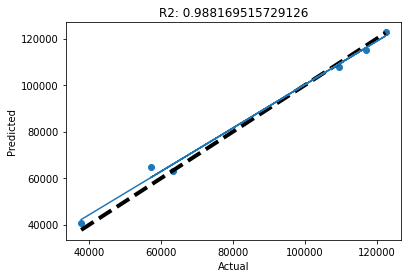

In [37]:
fig, ax = plt.subplots()  #creating multiple plots in one chart. ax-a single axes object or array of axes object. Fig is the Figure type object in matplotlib
ax.scatter(y_test, y_pred)
#y is the actual data set y value
#plotting of (ymin,ymin),(ymax,ymax) line
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4) #plotting of black dashed line. lw=linewidth, k-- = black dashed line
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))
ax.set_title('R2: ' + str(r2_score(y_test, y_pred)))
plt.show()

### Prediction

In [30]:
Lin.predict([[3.5]])

array([59374.11209418])

In [31]:
# So we see that there is a 2.5K error(2446.17). so we can say that we can give  60K +/- 2.5K for a person with 3.5 years of experience based on our model